In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data.csv', sep=',', index_col=0)

In [3]:
df = df.drop(['RepoAge', 'RepoLife'], axis=1)

In [53]:
df.columns

Index(['diskUsage', 'forkCount', 'isFork', 'Python', 'unclosed_issues',
       'assign_', 'assign_bio', 'stargazer_', 'milestone', 'milestone_closed',
       'release_', 'Ruby', 'Shell', 'HTML', 'JavaScript', 'Makefile', 'CSS',
       'C++', 'C', 'CMake', 'Java', 'RepoLife', 'languageCounter',
       'popularLanguageCounter', 'hasLanguage', 'description len',
       'has description', 'has issue', 'stargazer100', 'stargazer non zero',
       'has milestone'],
      dtype='object')

In [11]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [12]:
df_x = df.drop('label', axis=1)

In [13]:
df_y = df['label']

In [14]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=seed)

In [15]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
y_pred = xgb.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.9019455252918288

In [18]:
f1_score(y_test, y_pred)

0.37

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, df_x, df_y, cv=10)

In [20]:
scores.mean()

0.8970301505348234

In [21]:
scores.std()

0.008628596227128357

In [22]:
xgb.feature_importances_

array([0.14424635, 0.07374392, 0.01134522, 0.05105348, 0.02350081,
       0.07941653, 0.        , 0.05996758, 0.0089141 , 0.00243112,
       0.03079417, 0.03727715, 0.05186386, 0.04943274, 0.04132901,
       0.04132901, 0.02106969, 0.03808752, 0.02998379, 0.02755267,
       0.02188006, 0.04619125, 0.03484603, 0.        , 0.07293355,
       0.        , 0.        , 0.00081037, 0.        , 0.        ],
      dtype=float32)

In [52]:
xgb.get_booster().get_score(importance_type='gain')

{'forkCount': 10966473.115371136,
 'stargazer_': 9250813.220979592,
 'isFork': 3216805.7596153845,
 'popularLanguageCounter': 5022489.7172,
 'HTML': 2519794.089675001,
 'unclosed_issues': 2965242.6241700007,
 'Ruby': 1990732.9948800001,
 'assign_': 1782600.0901428573,
 'release_': 3478828.7083333335,
 'languageCounter': 1713194.3146666668,
 'CMake': 1151249.0825000003,
 'JavaScript': 1625790.3229444446,
 'diskUsage': 911783.5542697145,
 'milestone_closed': 2334312.396,
 'milestone': 1140511.03836,
 'Shell': 1535541.5278297872,
 'CSS': 998880.0999375002,
 'Makefile': 1360070.300631579,
 'Python': 1553931.8611777776,
 'C++': 1025621.3744285716,
 'description len': 1119941.7123791666,
 'C': 2127583.425727273,
 'Java': 836760.12,
 'stargazer100': 1126947.435}

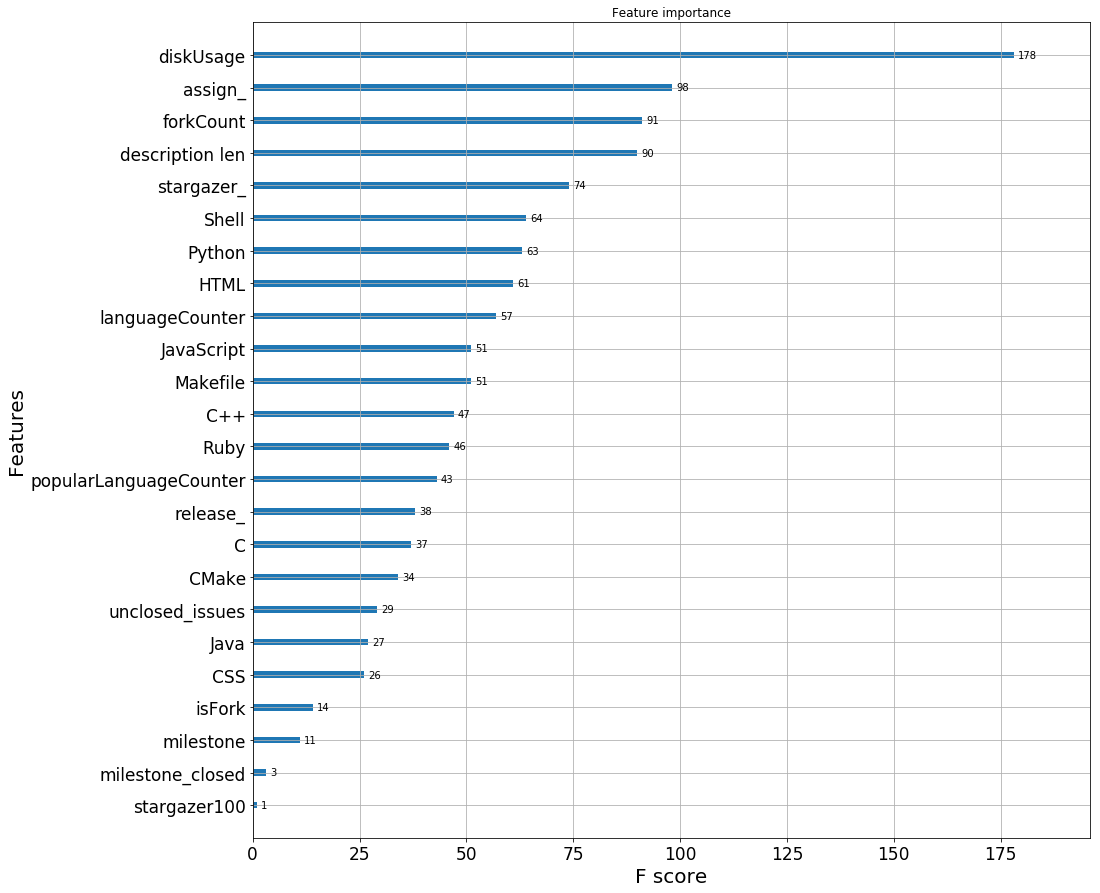

In [42]:
%matplotlib inline
from xgboost import plot_importance
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(15,15))
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylabel('Features', fontsize = 20) # Y label
ax.set_xlabel('F Score', fontsize = 20) # X label
plot_importance(xgb, ax=ax, figure=fig)
plt.savefig('foo.png')

In [43]:
df = pd.read_csv('data.csv', sep=',', index_col=0)

In [44]:
df = df.drop(['label', 'RepoAge'], axis=1)

In [45]:
df_x = df.drop('RepoLife', axis=1)

In [46]:
df_y = df['RepoLife']

In [47]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=seed)

In [48]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
y_pred = xgb.predict(X_test)

In [50]:
pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).sort_values(['y_true'])

,y_true,y_pred
1728,0,148.017197
3448,0,43.814220
1629,0,21.191206
1490,0,60.437412
3871,0,113.103905
2582,0,52.175606
1954,0,62.509426
73,0,13.792917
531,0,35.208961
1351,0,182.306931
